# <span style = "color:green; font-size:40px">Diabetic Retinopathy Classification with CNN</span>

***

Deep learning is a very significant subset of machine learning because of its high performance across various domains. Convolutional Neural Network (CNN), is a powerful image processing deep learning type often using in computer vision that comprises an image and video recognition along with a recommender system and natural language processing ( NLP).

CNN uses a multilayer system consists of the input layer, output layer, and a hidden layer that comprises multiple convolutional layers, pooling layers, fully connected layers.

#### We will be building a convolutional neural network that will be trained on a few hundred images of Diabetic Retinopathy, and later be able to predict the stage of Diabetic Retinopathy

We are going to use <b>Keras</b> deep learning library in python to build our CNN.

The process of building a Convolutional Neural Network always involves four major steps.

1. Convolution
2. Pooling
3. Flattening
4. Full Connection

### Import necessary libraries

In [57]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras import Sequential,layers
from tensorflow.keras.models import load_model, save_model
from sklearn.utils import shuffle
from skimage.transform import resize
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import glob

### Fetch the Training data

#### <span style = "color:purple">The glob module is used to retrieve files/pathnames matching a specified pattern.</span>

In [4]:
zero = glob.glob('training/0/*.jpeg')
one = glob.glob('training/1/*.jpeg')
two = glob.glob('training/2/*.jpeg')
three = glob.glob('training/3/*.jpeg')
four = glob.glob('training/4/*.jpeg')

### Fetch the testing data

In [6]:
zero_test = glob.glob('test/0/*.jpeg')
one_test = glob.glob('test/1/*.jpeg')
two_test = glob.glob('test/2/*.jpeg')
three_test = glob.glob('test/3/*.jpeg')
four_test = glob.glob('test/4/*.jpeg')

### Check the Number of images in Training ,Testing Set

In [11]:
print("Number of images in Training are, 0:",len(zero),",1:",len(one),",2:",len(two),",3:",len(three),",4:",len(four))
print("Number of images in Testing are, 0:",len(zero_test),",1:",len(one_test),",2:",len(two_test),",3:",len(three_test),",4:",len(four_test))

Number of images in Training are, 0: 286 ,1: 286 ,2: 297 ,3: 143 ,4: 99
Number of images in Testing are, 0: 141 ,1: 141 ,2: 141 ,3: 81 ,4: 56


### Create a list with the images and a seperate one with its corresponding labels for both training and testing set

#### Training set

In [12]:
image = []
label = []

for i in zero:
    img = plt.imread(i)
    image.append(img)
    label.append(0)

for i in one:
    img = plt.imread(i)
    image.append(img)
    label.append(1)
    
for i in two:
    img = plt.imread(i)
    image.append(img)
    label.append(2)
    
for i in three:
    img = plt.imread(i)
    image.append(img)
    label.append(3)
    
for i in four:
    img = plt.imread(i)
    image.append(img)
    label.append(4)

#### Testing set

In [13]:
image_test = []
label_test = []

for i in zero_test:
    img = plt.imread(i)
    image_test.append(img)
    label_test.append(0)

for i in one_test:
    img = plt.imread(i)
    image_test.append(img)
    label_test.append(1)
    
for i in two_test:
    img = plt.imread(i)
    image_test.append(img)
    label_test.append(2)
    
for i in three_test:
    img = plt.imread(i)
    image_test.append(img)
    label_test.append(3)
    
for i in four_test:
    img = plt.imread(i)
    image_test.append(img)
    label_test.append(4)

### Shuffle both images and labels

#### <span style = "color:purple">Here, we are using Shuffle module from sklearn utils</span>

#### Training set

In [14]:
image, label = shuffle(image,label, random_state = 100)

#### Testing set

In [15]:
image_test, label_test = shuffle(image_test,label_test, random_state = 100)

### Plot a few images

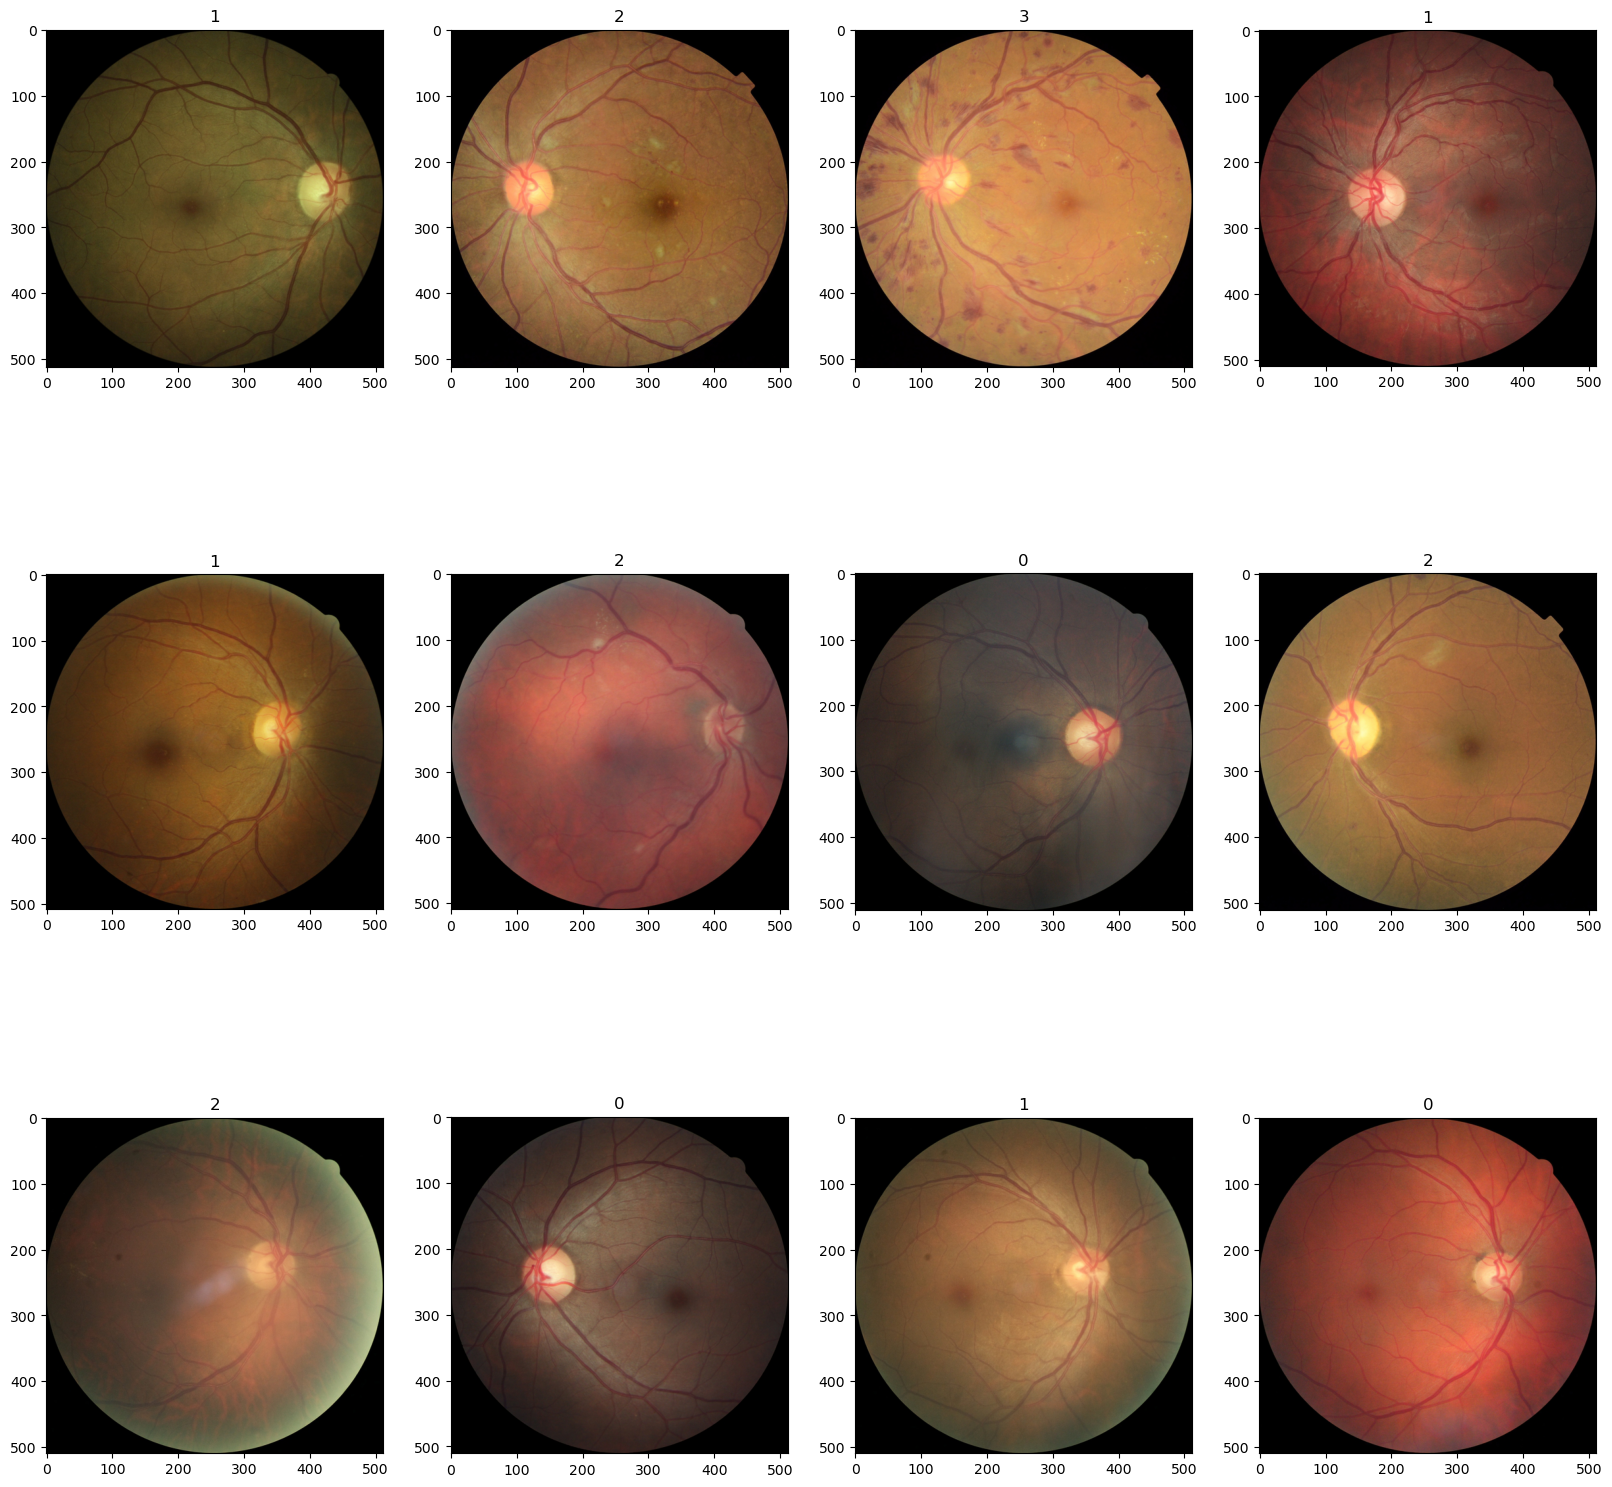

In [17]:
plt.figure(figsize = (20,20))
for i in range(12):
    plt.subplot(3,4,i+1)
    plt.imshow(image[i])
    plt.title(label[i])

### Resize the images to 224x224

#### <span style = "color:brown">All the images in our dataset are of different dimensions. We need to resize them to a same shape before feeding them to our neural network.</span>
Rescale operation resizes an image by a given scaling factor. The scaling factor can either be a single floating point value, or multiple values - one along each axis. Resize serves the same purpose, but allows to specify an output image shape instead of a scaling factor.

#### Training set

In [20]:
X_train = []

for i in image:
    X_train.append(resize(i,(224,224,3)))
    
X_train = np.array(X_train)

#### Testing set

In [21]:
X_test = []

for i in image_test:
    X_test.append(resize(i,(224,224,3)))
    
X_test = np.array(X_test)

### Plot some of the resized images

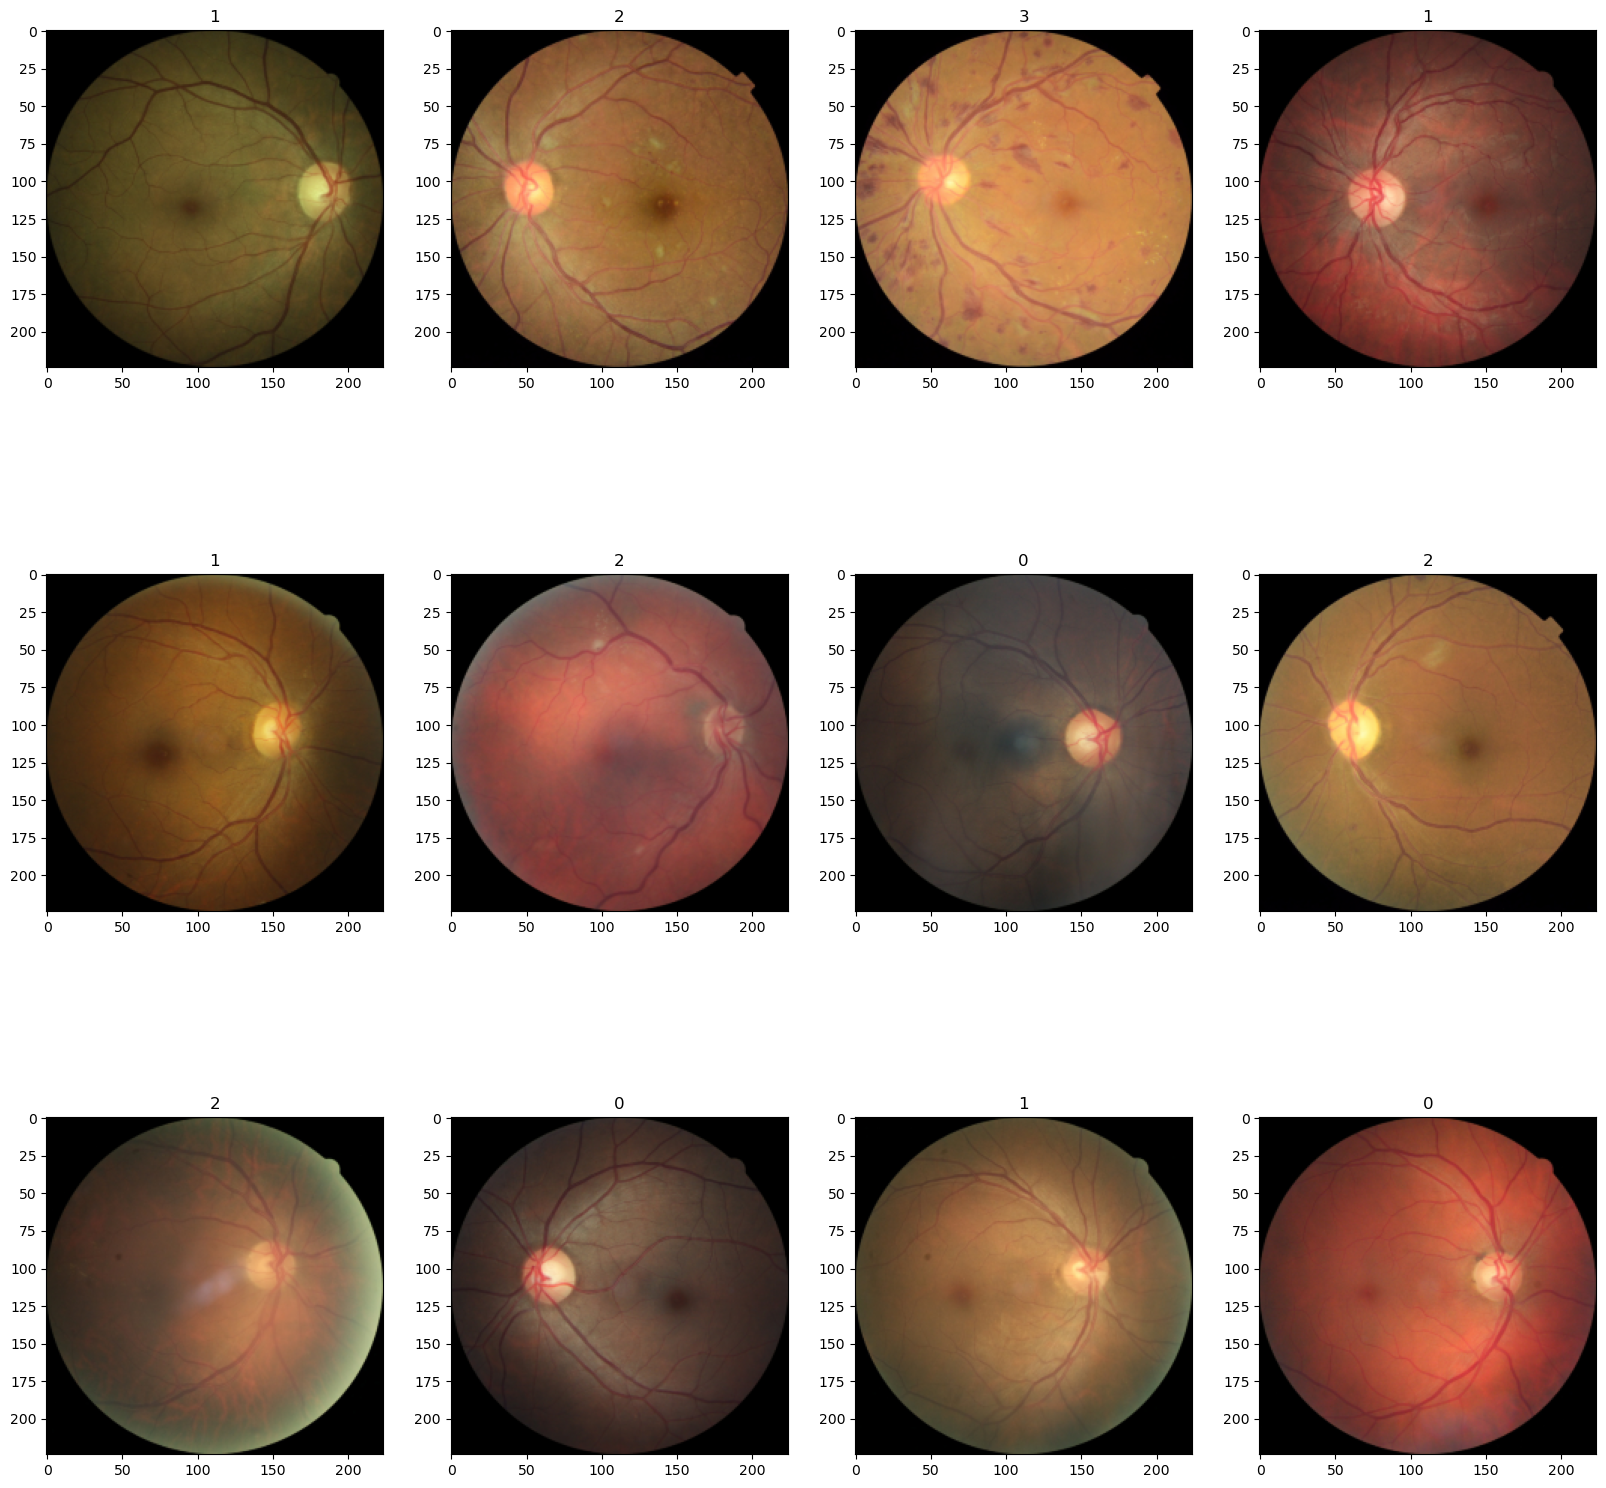

In [22]:
plt.figure(figsize = (20,20))
for i in range(12):
    plt.subplot(3,4,i+1)
    plt.imshow(X_train[i])
    plt.title(label[i])

### Check the datatype of X_train and Label

In [23]:
print(type(X_train))
print(type(label))

<class 'numpy.ndarray'>
<class 'list'>


### Convert label and test_label to Numpy array and store it in y_train and y_test

In [24]:
y_train = np.array(label)
y_test = np.array(label_test)

In [25]:
print(type(y_train))
print(type(y_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


### Check the shape of X_train and y_train

In [26]:
X_train.shape

(1111, 224, 224, 3)

In [27]:
y_train.shape

(1111,)

### Create Keras Sequential model with 2 convolution layer, Flatten and a Hidden layer

1. We first need to initiate sequential class since there are various layers to build CNN which all must be in sequence. Then we add the first convolutional layer where we need to specify some arguments.
    * The primary purpose of convolution is to find features in the image using a feature detector. Then put them into a feature map, which preserves distinct features of images.Feature detector which is known as a filter also is initialized randomly and then after a lot of iteration, filter matrix parameter selected which will be best for separating images. For instance, animals’ eye, nose, etc. will be considered as a feature which is used for classifying images using filter or feature detectors. Here we are using 16 features.
    * We also need to specify the size of our filter, Here we'll be using (3,3)
    * Activation Function – Relu, Since images are non-linear, to bring non-linearity, the relu activation function is applied after the convolutional operation.Relu stands for Rectified linear activation function. Relu function will output the input directly if it is positive, otherwise, it will output zero.
    *  Input shape - This argument shows image size – 224,224,3,Since the images in RGB format so, the third dimension of the image is 3.
    
2. Pooling Operation
    * We need to apply the pooling operation after initializing CNN. Pooling is an operation of down sampling of the image. The pooling layer is used to reduce the dimensions of the feature maps. Thus, the Pooling layer reduces the number of parameters to learn and reduces computation in the neural network.
    
3. Add an additional Convolutional Layer
    * This time with 32 filters. 
    * We specify our filter size as 3x3 same as before
    * Activation Function - Relu
    * (We do not need to specify input shape after the first layer)
    
4. Flattening Operation
    * Flattening operation is converting the dataset into a 1-D array for input into the next layer which is the fully connected layer.
    
5. Fully Connected layer and output layer
    * The output of the flattening operation work as input for the neural network. The aim of the artificial neural network makes the convolutional neural network more advanced and capable enough of classifying images.
    * Here we are using a dense class from the Keras library from creating a fully connected layer and output layer.
    * The sigmoid activation function is used for building the output layer.

In [39]:
model = Sequential([
    layers.Conv2D(16, (3,3), activation = 'relu', input_shape = (224,224, 3)),
    layers.MaxPool2D(2,2),
    
    layers.Conv2D(32,(3,3), activation = 'relu'),
    layers.MaxPool2D(2,2),
    
    layers.Flatten(),
    
    layers.Dense(64, activation = 'relu'),
    layers.Dense(5, activation = 'sigmoid')
])

### Compile our model

In [40]:
model.compile(optimizer = 'adam',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

### Check model summary

In [41]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 16)      448       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 111, 111, 16)     0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 109, 109, 32)      4640      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 54, 54, 32)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 93312)             0         
                                                                 
 dense_4 (Dense)             (None, 64)               

### Train our model with X_train and y_train

* The number of <b>epochs</b> is a hyperparameter of gradient descent that controls the number of complete passes through the training dataset.
* <b>steps_per_epoch</b> is batches of samples to train. It is used to define how many batches of samples to use in one epoch. It is used to declaring one epoch finished and starting the next epoch.
* Keras can separate a portion of your training data into a validation dataset and evaluate the performance of your model on that validation dataset each epoch. You can do this by setting the <b>validation_split</b> argument on the fit() function to a percentage of the size of your training dataset.

In [43]:
model.fit(X_train,y_train, epochs=30, steps_per_epoch=20, validation_split=0.1)

Epoch 1/30
20/20 [==============================] - 27s 1s/step - loss: 2.1353 - accuracy: 0.2462 - val_loss: 1.5764 - val_accuracy: 0.2946
Epoch 2/30
20/20 [==============================] - 25s 1s/step - loss: 1.5649 - accuracy: 0.2543 - val_loss: 1.5402 - val_accuracy: 0.2321
Epoch 3/30
20/20 [==============================] - 24s 1s/step - loss: 1.5373 - accuracy: 0.2863 - val_loss: 1.5148 - val_accuracy: 0.2768
Epoch 4/30
20/20 [==============================] - 24s 1s/step - loss: 1.5167 - accuracy: 0.2973 - val_loss: 1.5173 - val_accuracy: 0.2679
Epoch 5/30
20/20 [==============================] - 24s 1s/step - loss: 1.5104 - accuracy: 0.2983 - val_loss: 1.4908 - val_accuracy: 0.3125
Epoch 6/30
20/20 [==============================] - 26s 1s/step - loss: 1.4969 - accuracy: 0.3353 - val_loss: 1.4757 - val_accuracy: 0.2768
Epoch 7/30
20/20 [==============================] - 26s 1s/step - loss: 1.4757 - accuracy: 0.3413 - val_loss: 1.4678 - val_accuracy: 0.2768
Epoch 8/30
20/20 [==

### Evaluate our model

In [44]:
model.evaluate(X_train, y_train)

35/35 [==============================] - 5s 143ms/step - loss: 1.0354 - accuracy: 0.6022


[1.035378098487854, 0.6021602153778076]

### Save the model

In [58]:
model.save('Diabetic_Model.h5')

In [62]:
X_test[0]

array([[[0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        ...,
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00]],

       [[0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        ...,
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00]],

       [[0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        ...,
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00

In [67]:
X_test[0].reshape((1,224,224,3))

array([[[[0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         ...,
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00]],

        [[0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         ...,
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00]],

        [[0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         ...,
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [

In [68]:
model.predict(X_test[0].reshape((1,224,224,3)))

1/1 [==============================] - 0s 53ms/step


array([[0.78502804, 0.58611584, 0.64889586, 0.48742723, 0.20156547]],
      dtype=float32)

### Make predictions with X_test

In [45]:
prediction = model.predict(X_test)

18/18 [==============================] - 3s 136ms/step


In [46]:
prediction[:5]

array([[0.7850284 , 0.5861156 , 0.6488961 , 0.4874278 , 0.20156516],
       [0.9794335 , 0.96928954, 0.551719  , 0.4821676 , 0.02180149],
       [0.5935329 , 0.46675166, 0.8066973 , 0.47417954, 0.57775086],
       [0.8761039 , 0.37578934, 0.65330184, 0.14564191, 0.5261943 ],
       [0.9424437 , 0.39794916, 0.6072803 , 0.7343648 , 0.20858884]],
      dtype=float32)

#### Our prediction is numbers ranging from 0 to 1. We can convert values less than 0.5 to 0 and rest to 1.

In [48]:
pred = [np.argmax(i) for i in prediction]

In [49]:
pred

[0,
 0,
 2,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 2,
 2,
 1,
 2,
 0,
 1,
 0,
 0,
 1,
 2,
 3,
 1,
 2,
 2,
 0,
 3,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 2,
 0,
 0,
 0,
 2,
 1,
 1,
 1,
 2,
 0,
 1,
 1,
 3,
 0,
 0,
 1,
 0,
 2,
 3,
 4,
 1,
 0,
 2,
 0,
 3,
 0,
 4,
 0,
 0,
 2,
 0,
 2,
 1,
 3,
 0,
 2,
 3,
 2,
 3,
 2,
 0,
 3,
 4,
 4,
 0,
 0,
 2,
 2,
 0,
 0,
 0,
 0,
 1,
 2,
 2,
 1,
 0,
 1,
 0,
 0,
 1,
 2,
 3,
 0,
 4,
 3,
 1,
 0,
 1,
 4,
 1,
 3,
 3,
 0,
 0,
 1,
 2,
 0,
 4,
 3,
 2,
 0,
 0,
 1,
 2,
 4,
 2,
 2,
 2,
 1,
 3,
 0,
 0,
 3,
 4,
 3,
 0,
 0,
 2,
 2,
 2,
 0,
 0,
 0,
 0,
 0,
 1,
 3,
 0,
 4,
 1,
 1,
 2,
 1,
 0,
 4,
 4,
 3,
 2,
 2,
 1,
 2,
 2,
 1,
 2,
 2,
 0,
 0,
 3,
 1,
 1,
 3,
 0,
 2,
 0,
 0,
 1,
 0,
 2,
 4,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 2,
 4,
 1,
 2,
 0,
 0,
 0,
 1,
 1,
 0,
 4,
 2,
 4,
 2,
 1,
 2,
 0,
 1,
 2,
 3,
 0,
 2,
 1,
 2,
 1,
 0,
 0,
 2,
 0,
 3,
 3,
 1,
 1,
 0,
 0,
 0,
 2,
 2,
 1,
 2,
 3,
 0,
 0,
 0,
 1,
 2,
 0,
 0,
 0,
 0,
 1,
 2,
 2,
 2,
 0,
 0,
 1,
 1,
 0,
 3,
 1,
 0,
 0,
 2,


### Plot X_test along with label from our prediction

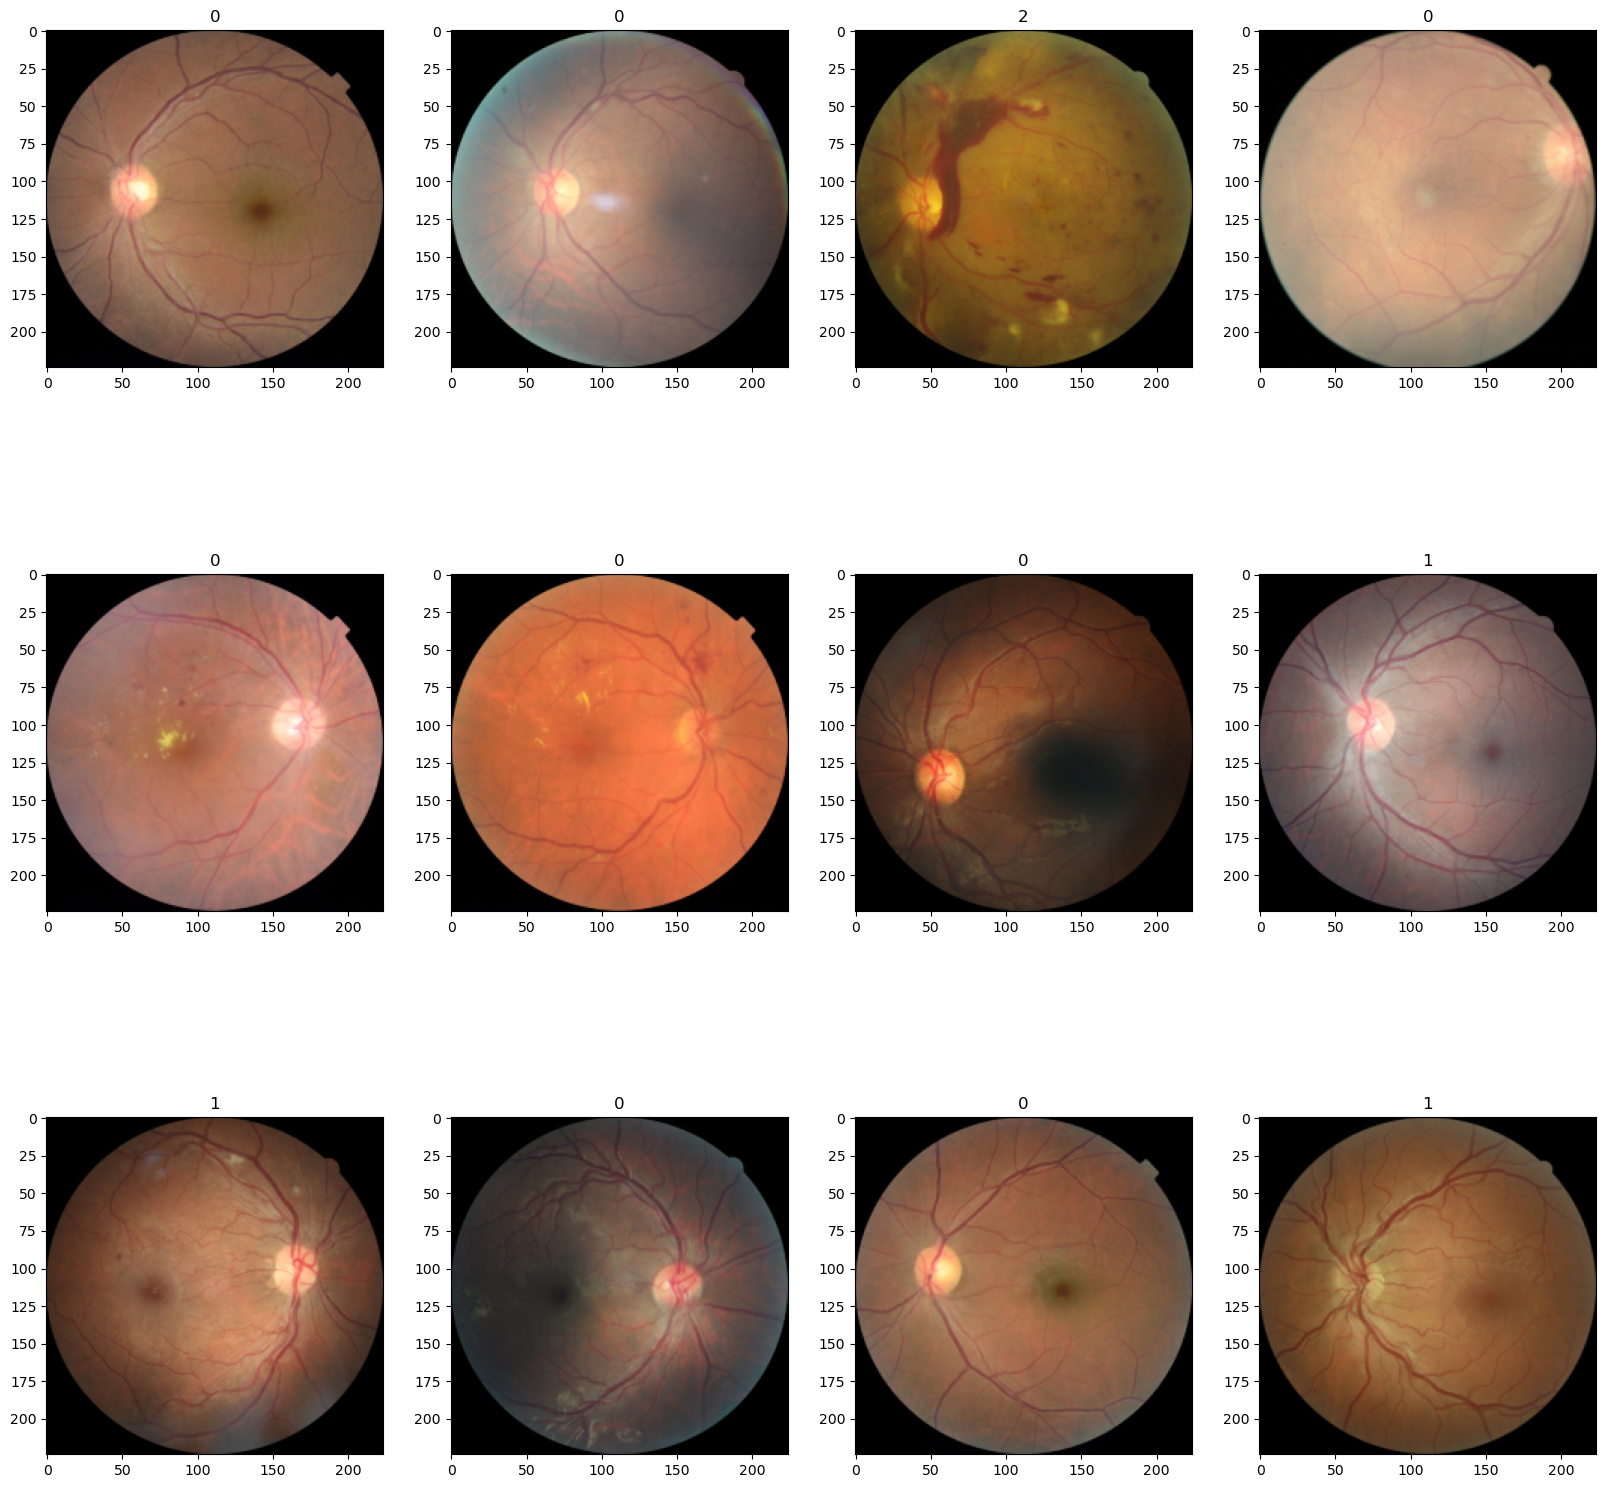

In [50]:
plt.figure(figsize = (20,20))
for i in range(12):
    plt.subplot(3,4,i+1)
    plt.imshow(X_test[i])
    plt.title(pred[i])

### Plot confusion matrix on a heatmap

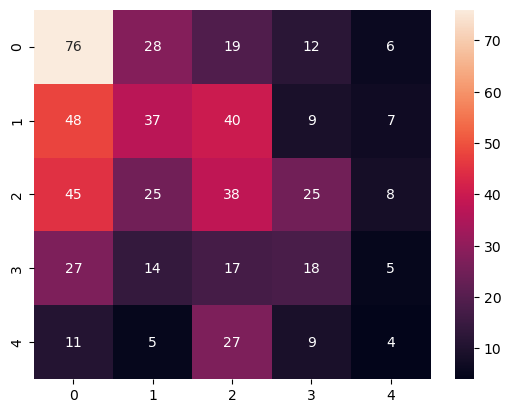

In [51]:
sns.heatmap(confusion_matrix(y_test,pred), annot = True)
plt.show()

### Print Classification report

In [54]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.37      0.54      0.44       141
           1       0.34      0.26      0.30       141
           2       0.27      0.27      0.27       141
           3       0.25      0.22      0.23        81
           4       0.13      0.07      0.09        56

    accuracy                           0.31       560
   macro avg       0.27      0.27      0.27       560
weighted avg       0.29      0.31      0.30       560



### Print Accuracy Score

In [55]:
accuracy_score(y_test,pred)

0.30892857142857144

***